In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from highlight_text import fig_text

In [2]:
mpl.rcParams['figure.dpi']= 200

In [3]:
df = pd.read_csv('00-1-shipman-confirmed-victims-x.csv') 

In [4]:
palette = {
    'Women' : '#f03e3e',
    'Men' : '#1c7ed6'
}

colour_grey = '#495057'

In [5]:
df

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women
...,...,...,...,...,...,...,...,...,...,...
210,20-Mar-98,Ada Warburton,77,Own home,Unlawful killing,1998,0,1997.72,75-79,Women
211,24-Mar-98,Martha Marley,88,Own home,Unlawful killing,1998,0,1997.73,85-89,Women
212,11-May-98,Winifred Mellor,73,Own home,Conviction,1998,0,1997.86,70-74,Women
213,12-Jun-98,Joan May Melia,73,Own home,Conviction,1998,0,1997.95,70-74,Women


In [6]:
bins_age = np.arange(start=df['Age'].min(), stop=df['Age'].max(), step=2)

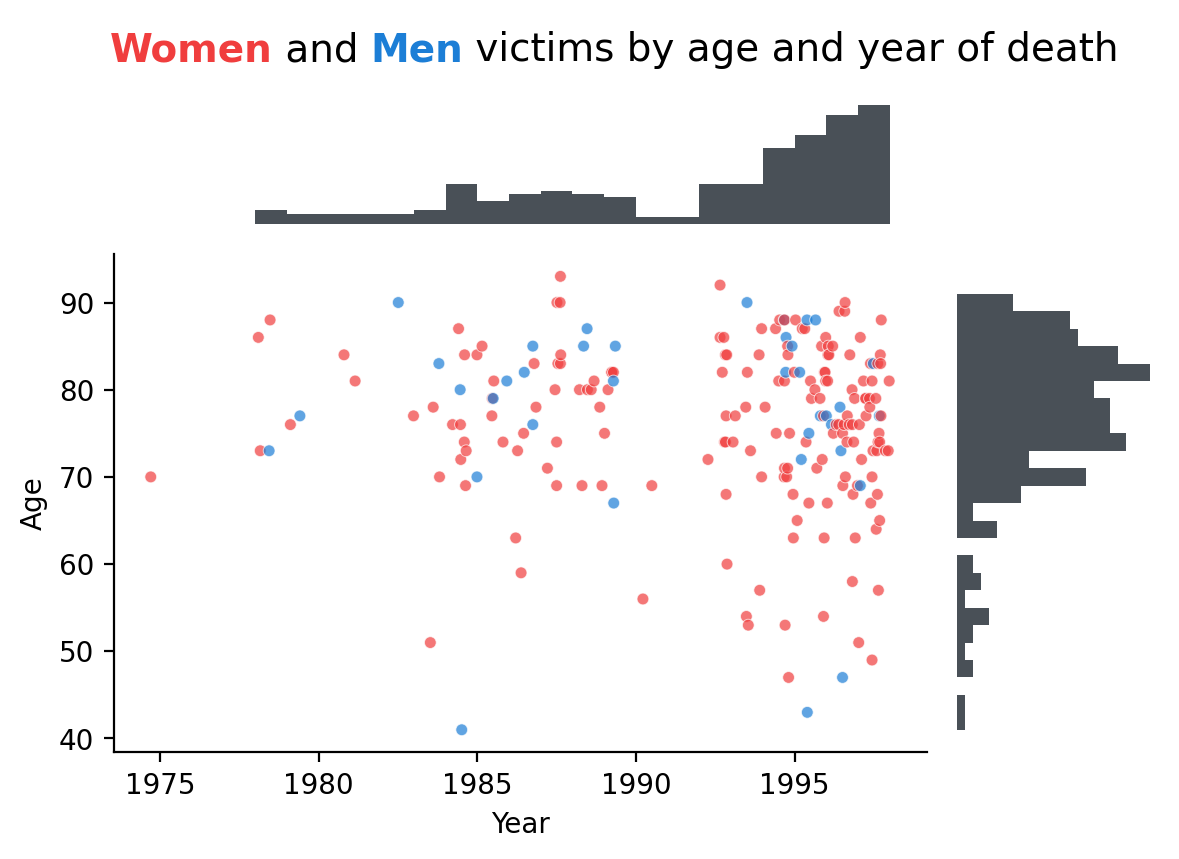

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, gridspec_kw={'width_ratios' : [4,1], 'height_ratios' : [1,4]}, sharex='col', sharey='row')

sns.scatterplot(data=df, x='fractionalDeathYear', y='Age', hue='gender2', palette=palette, alpha=0.7, ax=ax.flatten()[2], size=3, legend=False)
ax.flatten()[0].hist(x=df['fractionalDeathYear'], bins=list(set(df['yearOfDeath'])), color=colour_grey)
ax.flatten()[3].hist(x=df['Age'], bins=bins_age, color=colour_grey, orientation='horizontal')

plot_title = '<Women> and <Men> victims by age and year of death'

highlight_textprops = [
    {"color": palette["Women"], "fontweight": "bold"},
    {"color": palette["Men"], "fontweight": "bold"}
    ]
              
fig_text(x=0.1, y=1.0, s=plot_title, highlight_textprops=highlight_textprops, fontsize=14, va='bottom')

for i, axis in enumerate(ax.flatten()):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    if i != 2:
        axis.spines['left'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',         # both major and minor ticks are affected
            bottom=False,         # ticks along the bottom edge are off
            left=False,           # ticks along the left edge are off
            labelbottom=False,    # labels along the bottom edge are off
            labelleft=False)      # labels along the left edge are off

ax.flatten()[2].set_xlabel('Year')
ax.flatten()[2].set_ylabel('Age')

fig.tight_layout()